<a href="https://colab.research.google.com/github/AhmedAdel555/Udemy-Courses/blob/main/udemy_courses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime, timezone
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [3]:
  # nltk.download('punkt')
  # nltk.download('stopwords')
  # nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
# load the dataset
df = pd.read_csv('/content/udemy_courses-raw.csv', encoding='ISO-8859-1')
df.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [5]:
df.shape

(3678, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


# **Data Preprocessing**

In [7]:
# check for dublicates
df['course_id'].nunique()

3672

In [8]:
df[df.duplicated()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance
1473,185526,MicroStation - CÃ©lulas,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03T00:55:31Z,Web Development


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
print(df.shape)
print(df['course_id'].nunique())

(3672, 12)
3672


In [11]:
df.set_index('course_id', inplace=True)
df.head(5)

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
course_id,,,,,,,,,,,
1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [12]:
# check for date column
df['published_timestamp'] = pd.to_datetime(df['published_timestamp']).dt.tz_localize(None)
df.dtypes

course_title                   object
url                            object
is_paid                          bool
price                           int64
num_subscribers                 int64
num_reviews                     int64
num_lectures                    int64
level                          object
content_duration              float64
published_timestamp    datetime64[ns]
subject                        object
dtype: object

In [13]:
# check for null values
df.isna().sum()

course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']


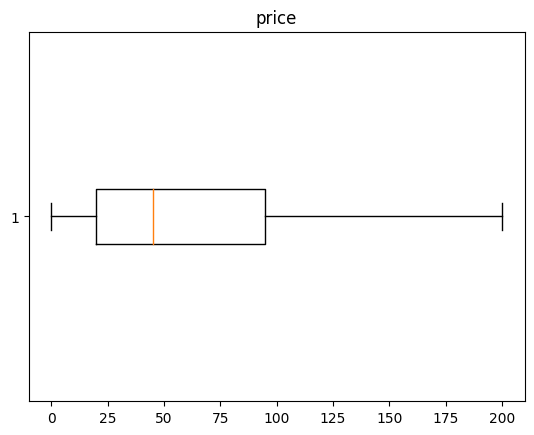

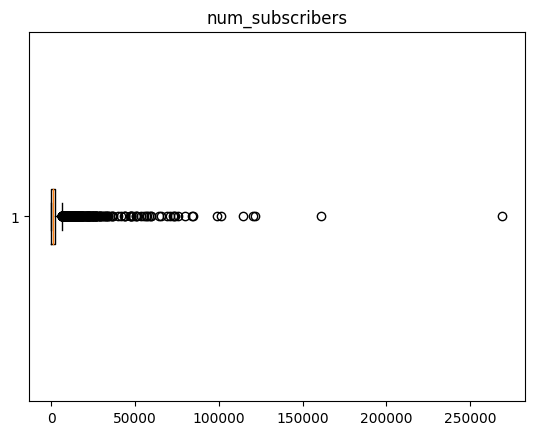

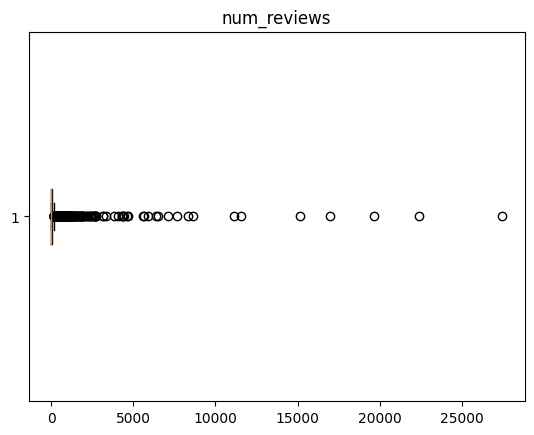

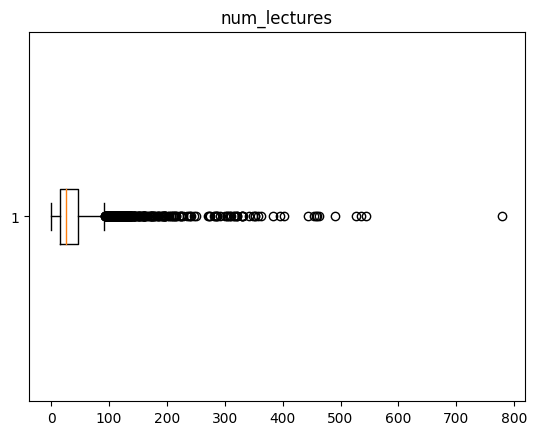

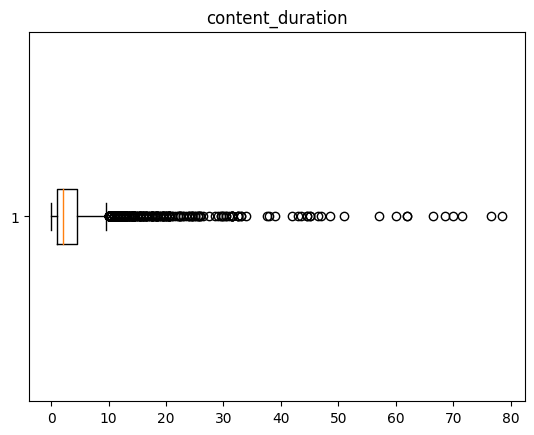

In [14]:
columns_detect_outliers = df.describe().columns
print(list(columns_detect_outliers))
for c in list(columns_detect_outliers):
  plt.boxplot(df[c],vert=False)
  plt.title(c)
  plt.show()

In [15]:
# detect and handle outliers by zscore
columns_detect_outliers = df.describe().columns
for column in columns_detect_outliers:
  upper = df[column].mean() + 3*df[column].std()
  lower = df[column].mean() - 3*df[column].std()
  df[column] = df[column].clip(lower = lower, upper = upper)
  df[column] = df[column].round().astype(int)

In [16]:
df.head()

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
course_id,,,,,,,,,,,
1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,2,2017-01-18 20:58:58,Business Finance
1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,191,All Levels,22,2017-03-09 16:34:20,Business Finance
1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2,2016-12-19 19:26:30,Business Finance
1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3,2017-05-30 20:07:24,Business Finance
1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2,2016-12-13 14:57:18,Business Finance


# **Exploratory Data Analysis**

In [17]:
df.describe().round(2)

,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3672.00,3672.00,3672.00,3672.00,3672.00
mean,66.10,2746.95,115.44,37.90,3.90
std,61.04,5322.16,355.35,37.18,4.27
min,0.00,0.00,0.00,0.00,0.00
25%,20.00,111.75,4.00,15.00,1.00
50%,45.00,912.00,18.00,25.00,2.00
75%,95.00,2548.75,67.00,46.00,4.00
max,200.00,31655.00,2965.00,191.00,22.00


In [18]:
df['year'] = df['published_timestamp'].dt.year
df['month'] = df['published_timestamp'].dt.month_name()
df['day'] = df['published_timestamp'].dt.day_name()
df['profit'] = df['price'] * df['num_subscribers']

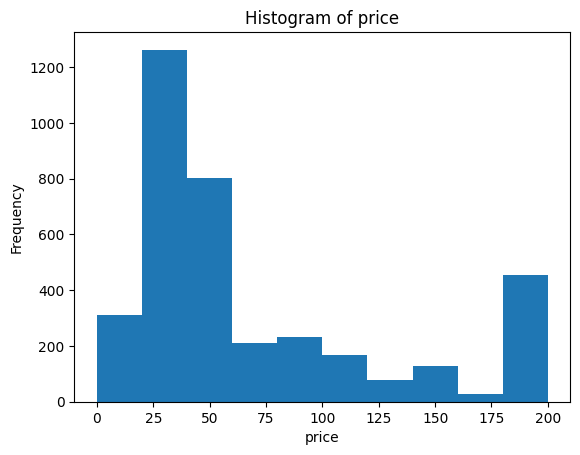

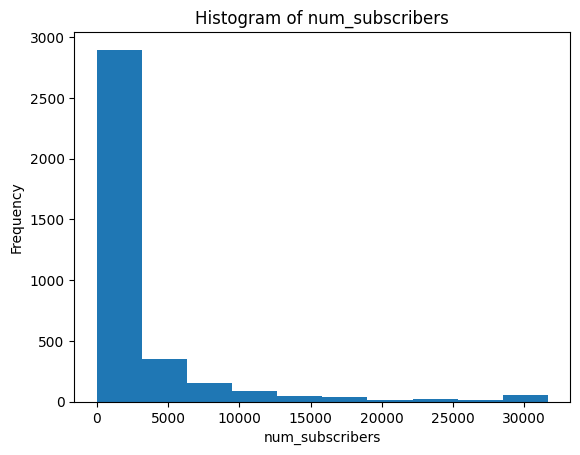

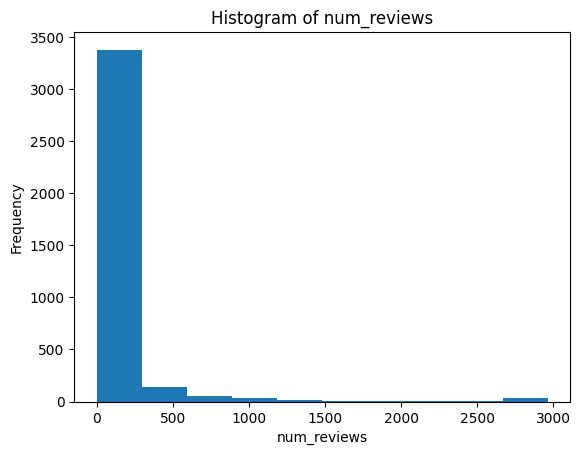

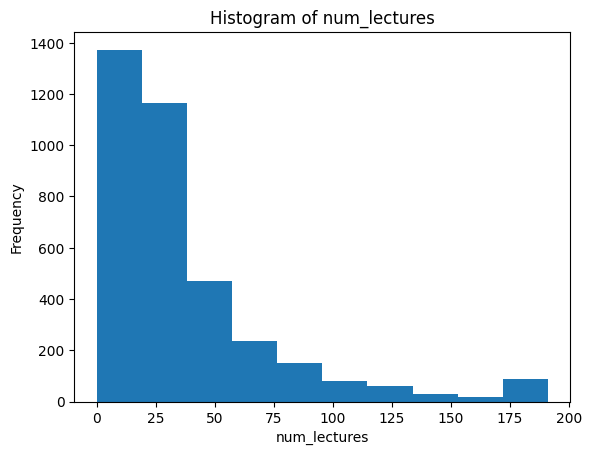

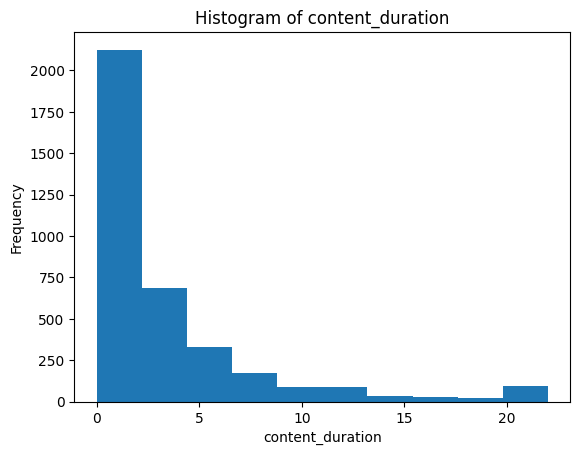

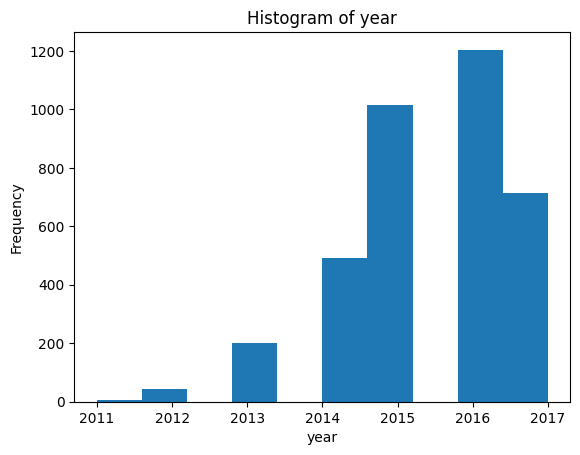

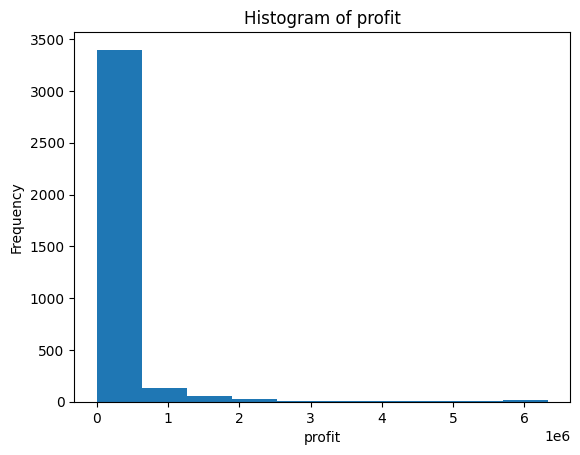

In [19]:
#Histograms
numeric_columns = df.select_dtypes(include='number').columns
for column in numeric_columns:
    plt.figure()  
    df[column].plot.hist()  
    plt.title(f'Histogram of {column}')  
    plt.xlabel(column)  
    plt.ylabel('Frequency')  
    plt.show()

In [20]:
df["subject"]

course_id
1070968    Business Finance
1113822    Business Finance
1006314    Business Finance
1210588    Business Finance
1011058    Business Finance
                 ...       
775618      Web Development
1088178     Web Development
635248      Web Development
905096      Web Development
297602      Web Development
Name: subject, Length: 3672, dtype: object

In [21]:
# # what is the subjects and their counts
subject_counts = df["subject"].value_counts().reset_index()
subject_counts.columns = ["subject", "count"]
subject_counts

,subject,count
0,Web Development,1199
1,Business Finance,1191
2,Musical Instruments,680
3,Graphic Design,602


<Axes: ylabel='subject'>

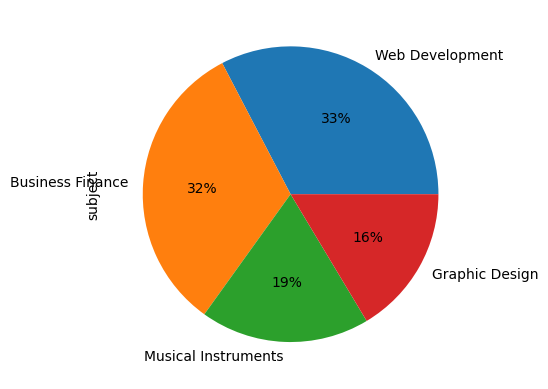

In [22]:
# what is the subjects and their percentage
df["subject"].value_counts().plot(kind="pie", autopct='%1.0f%%')

In [23]:
# how many subscribers in each subject
subject_with_subscribers = df.groupby("subject")["num_subscribers"].sum().reset_index()
subject_with_subscribers.columns = ['subject', 'num_subscribers']
subject_with_subscribers

,subject,num_subscribers
0,Business Finance,1790586
1,Graphic Design,1006224
2,Musical Instruments,716069
3,Web Development,6573910


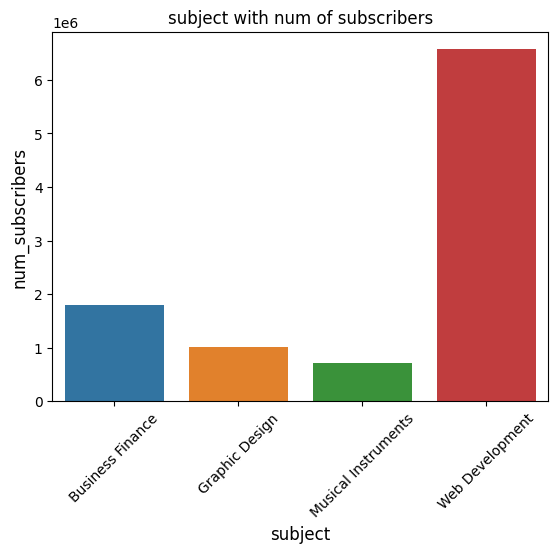

In [24]:
sns.barplot(x = 'subject', y = 'num_subscribers', data = subject_with_subscribers)
plt.title('subject with num of subscribers')
plt.ylabel('num_subscribers', fontsize=12)
plt.xlabel('subject', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [25]:
subject_mean_price = df.groupby("subject")["price"].mean().round(2).reset_index()
subject_mean_price.columns = ["subject", "price"]
subject_mean_price.sort_values(by="price", ascending=False)

,subject,price
3,Web Development,77.04
0,Business Finance,68.69
1,Graphic Design,57.89
2,Musical Instruments,49.56


In [26]:
subject_mean_price = df.groupby("subject")["content_duration"].mean().round(2).reset_index()
subject_mean_price.columns = ["subject", "content_duration"]
subject_mean_price.sort_values(by="content_duration")

,subject,content_duration
2,Musical Instruments,2.88
0,Business Finance,3.37
1,Graphic Design,3.40
3,Web Development,5.25


In [27]:
df.pivot_table(index="subject", columns="is_paid", values="url" ,fill_value=0, margins=True, aggfunc="count")

is_paid,False,True,All
subject,,,
Business Finance,96,1095,1191
Graphic Design,35,567,602
Musical Instruments,46,634,680
Web Development,133,1066,1199
All,310,3362,3672


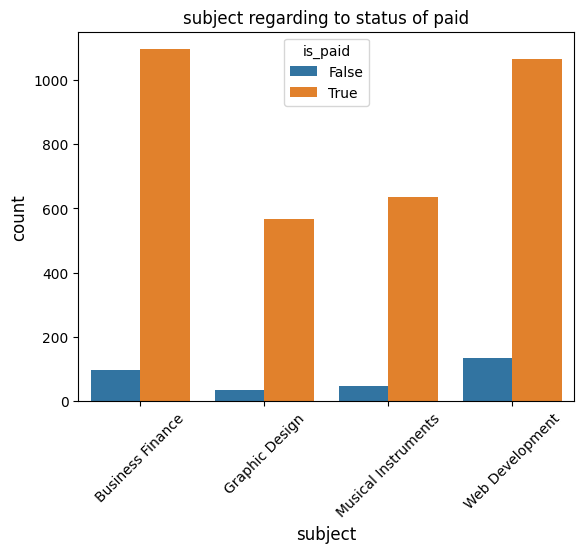

In [28]:
sns.countplot(data= df , x= df["subject"], hue="is_paid")
plt.title('subject regarding to status of paid')
plt.ylabel('count', fontsize=12)
plt.xlabel('subject', fontsize=12)
plt.xticks(rotation=45)
plt.show()

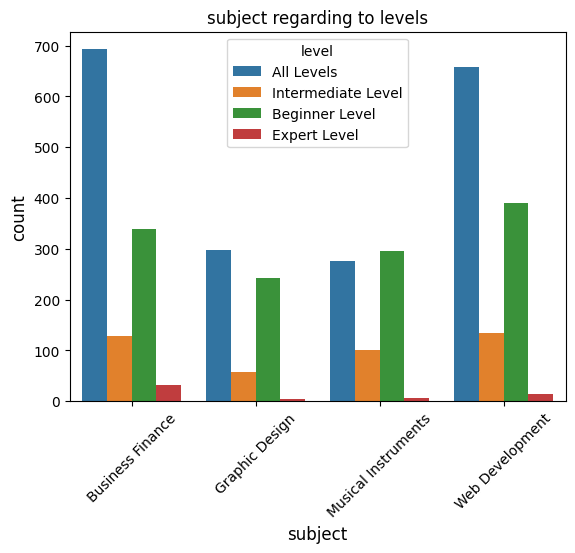

In [29]:
sns.countplot(data= df , x= df["subject"], hue="level")
plt.title('subject regarding to levels')
plt.ylabel('count', fontsize=12)
plt.xlabel('subject', fontsize=12)
plt.xticks(rotation=45)
plt.show()

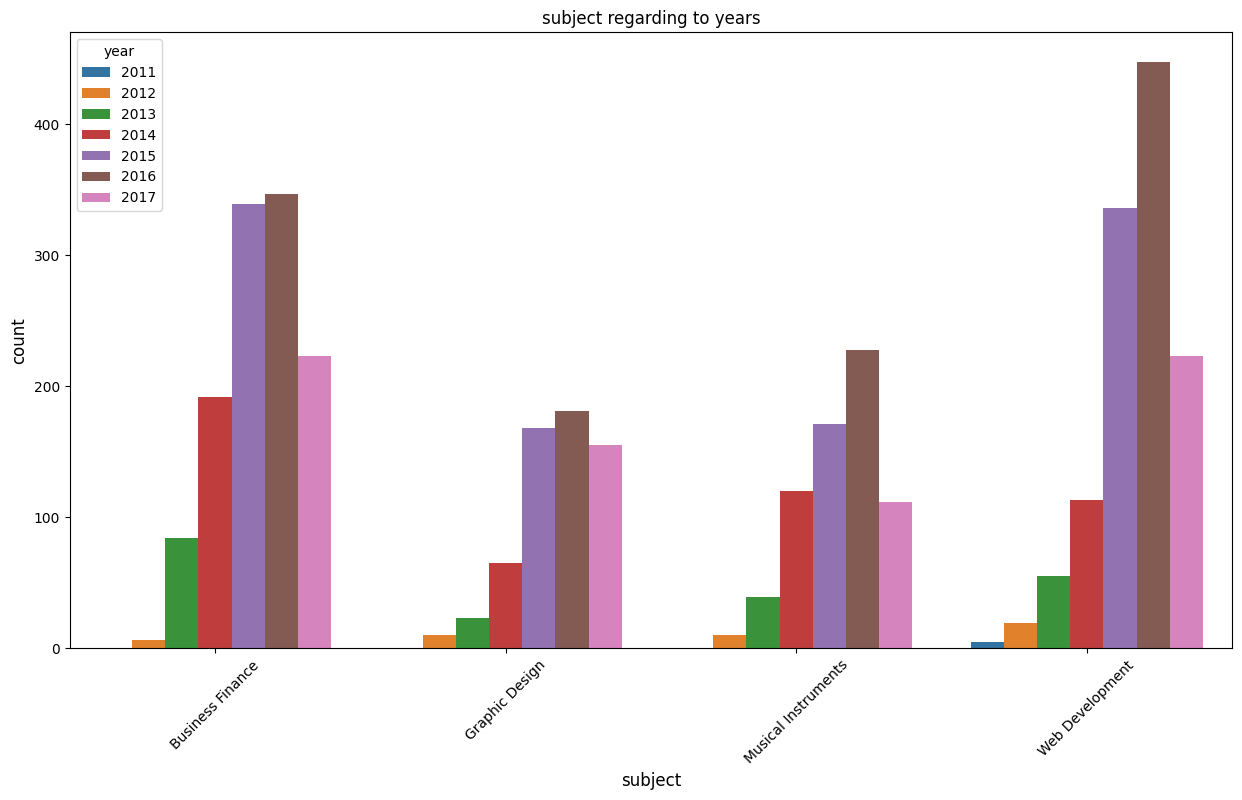

In [30]:
plt.figure(figsize=(15,8))
sns.countplot(data= df , x= df["subject"], hue="year")
plt.title('subject regarding to years')
plt.ylabel('count', fontsize=12)
plt.xlabel('subject', fontsize=12)
plt.xticks(rotation=45)
plt.show()

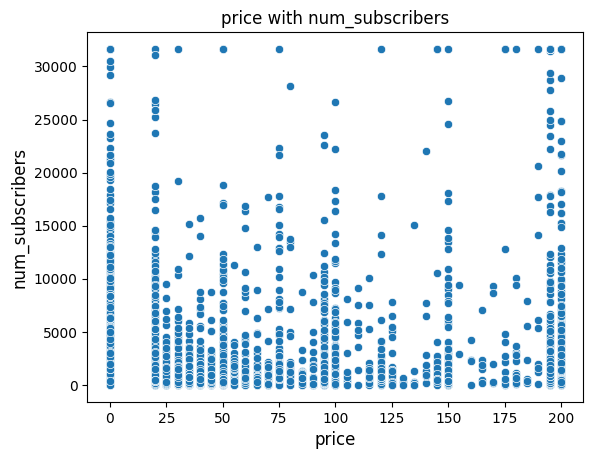

In [31]:
sns.scatterplot(data=df, x="price", y="num_subscribers")
plt.title('price with num_subscribers')
plt.ylabel('num_subscribers', fontsize=12)
plt.xlabel('price', fontsize=12)
plt.show()

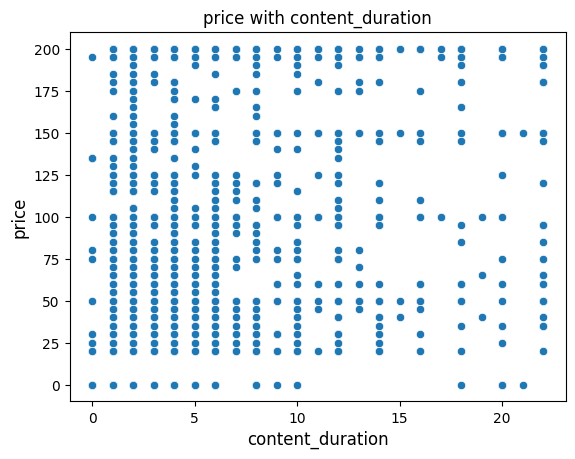

In [32]:
sns.scatterplot(data=df, x="content_duration", y="price")
plt.title('price with content_duration')
plt.ylabel('price', fontsize=12)
plt.xlabel('content_duration', fontsize=12)
plt.show()

In [33]:
num_subscribers_each_year = df.groupby("year")["num_subscribers"].sum().reset_index()
num_subscribers_each_year.columns = ["year", "num_subscribers"]
num_subscribers_each_year
fig = px.line(num_subscribers_each_year, x="year", y="num_subscribers")
fig.show()

# **ML Model to classify the subject of the course**

In [34]:
data = df.copy(deep=True)
data

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month,day,profit
course_id,,,,,,,,,,,,,,,
1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,2,2017-01-18 20:58:58,Business Finance,2017,January,Wednesday,429400
1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,191,All Levels,22,2017-03-09 16:34:20,Business Finance,2017,March,Thursday,209400
1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2,2016-12-19 19:26:30,Business Finance,2016,December,Monday,97830
1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3,2017-05-30 20:07:24,Business Finance,2017,May,Tuesday,232845
1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2,2016-12-13 14:57:18,Business Finance,2016,December,Tuesday,255200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2,2016-06-14 17:36:46,Web Development,2016,June,Tuesday,104000
1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,4,2017-03-10 22:24:30,Web Development,2017,March,Friday,7650
635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,4,2015-12-30 16:41:42,Web Development,2015,December,Wednesday,20520


*pre processing for machine learning*




In [35]:
reference_date = datetime.now()
data['days'] = (reference_date - data['published_timestamp']).dt.days

In [36]:
# handle numeric columns
data['duration_category'] = pd.cut(data['content_duration'],bins=[0,1,3,7,12,20,np.inf],labels=['0:1','1:3','3:7','7:12','12:20','20+'], include_lowest=True)
data['price_category'] = pd.cut(data["price"],bins=[0,1,50,100,150,np.inf],labels=["Free","1:50","50:100",'100:150',"150+"], include_lowest=True)
data['num_lectures_category'] = pd.cut(data["num_lectures"],bins=[0,50,100,150,200],labels=["0:50","50:100",'100:150',"150:200"], include_lowest=True)
data['num_subscribers_category'] = pd.cut(data["num_subscribers"],bins = 5,labels=["very low","low", "median", "large", "very large"], include_lowest=True)
data['num_reviews_category'] = pd.cut(data["num_reviews"],bins = 5,labels=["very low","low", "median", "large", "very large"], include_lowest=True)
data['profit_category'] = pd.cut(data["profit"],bins = 5,labels=["very low","low", "median", "large", "very large"], include_lowest=True)
data['status'] = pd.cut(data["days"],bins = 5,labels=["recent", "new","median","old","very old"], include_lowest=True)
data.sample(10)

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,...,day,profit,days,duration_category,price_category,num_lectures_category,num_subscribers_category,num_reviews_category,profit_category,status
course_id,,,,,,,,,,,,,,,,,,,,,
1088656,Quantitative Trading Analysis with Python,https://www.udemy.com/quantitative-trading-ana...,True,50,256,17,49,All Levels,6,2017-01-27 17:11:28,...,Friday,12800,2319,3:7,1:50,0:50,very low,very low,very low,recent
523312,Python Web Programming,https://www.udemy.com/python-web-programming/,True,100,1020,46,60,Beginner Level,6,2015-07-01 21:46:36,...,Wednesday,102000,2894,3:7,50:100,50:100,very low,very low,very low,new
1053272,The Financial Analyst Skills Training (FAST) c...,https://www.udemy.com/the-financial-analyst-sk...,True,100,589,31,138,All Levels,10,2017-01-02 17:44:17,...,Monday,58900,2343,7:12,50:100,100:150,very low,very low,very low,recent
770526,Sending email with PHP: from Basic to Advanced,https://www.udemy.com/php-email/,True,40,379,58,45,All Levels,2,2016-06-10 16:23:33,...,Friday,15160,2550,1:3,1:50,0:50,very low,very low,very low,recent
566248,jQuery Fundamentals Powerful Bootcamp for begi...,https://www.udemy.com/jquery-fundamentals-boot...,True,150,13882,63,47,All Levels,3,2015-08-04 18:54:44,...,Tuesday,2082300,2860,1:3,100:150,0:50,median,very low,low,new
114518,Improve Your Financial Literacy,https://www.udemy.com/improve-your-financial-l...,False,0,9995,96,10,All Levels,2,2014-02-10 03:50:00,...,Monday,0,3401,1:3,Free,0:50,low,very low,very low,median
147754,Guitar Technique Mastery: The Ultimate Chop Bu...,https://www.udemy.com/the-ultimate-chop-buildi...,True,20,273,4,6,All Levels,2,2014-01-16 17:22:04,...,Thursday,5460,3425,1:3,1:50,0:50,very low,very low,very low,median
856968,How to Make a Wordpress Website 2017,https://www.udemy.com/how-to-wordpress/,False,0,2437,137,10,Beginner Level,1,2016-06-07 00:02:04,...,Tuesday,0,2553,0:1,Free,0:50,very low,very low,very low,recent
591724,Financial Market Environment & Investment Stra...,https://www.udemy.com/financial-market-environ...,True,105,1,0,25,All Levels,2,2017-06-20 02:29:09,...,Tuesday,105,2175,1:3,100:150,0:50,very low,very low,very low,recent


In [37]:
# drop useless columns
data.reset_index(drop=True, inplace=True)
data.drop(['url', 'published_timestamp' , 'year'	, 'month', 	'day', "content_duration", "price", "num_lectures", "num_subscribers", "num_reviews", "profit", "days"], axis='columns', inplace=True)
data.head()

,course_title,is_paid,level,subject,duration_category,price_category,num_lectures_category,num_subscribers_category,num_reviews_category,profit_category,status
0,Ultimate Investment Banking Course,True,All Levels,Business Finance,1:3,150+,50:100,very low,very low,very low,recent
1,Complete GST Course & Certification - Grow You...,True,All Levels,Business Finance,20+,50:100,150:200,very low,low,very low,recent
2,Financial Modeling for Business Analysts and C...,True,Intermediate Level,Business Finance,1:3,1:50,50:100,very low,very low,very low,recent
3,Beginner to Pro - Financial Analysis in Excel ...,True,All Levels,Business Finance,1:3,50:100,0:50,very low,very low,very low,recent
4,How To Maximize Your Profits Trading Options,True,Intermediate Level,Business Finance,1:3,150+,0:50,very low,very low,very low,recent


In [38]:
import string
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

data['course_title'] = data['course_title'].apply(lambda x:remove_punctuation(x))
data.head()

,course_title,is_paid,level,subject,duration_category,price_category,num_lectures_category,num_subscribers_category,num_reviews_category,profit_category,status
0,Ultimate Investment Banking Course,True,All Levels,Business Finance,1:3,150+,50:100,very low,very low,very low,recent
1,Complete GST Course Certification Grow Your ...,True,All Levels,Business Finance,20+,50:100,150:200,very low,low,very low,recent
2,Financial Modeling for Business Analysts and C...,True,Intermediate Level,Business Finance,1:3,1:50,50:100,very low,very low,very low,recent
3,Beginner to Pro Financial Analysis in Excel 2017,True,All Levels,Business Finance,1:3,50:100,0:50,very low,very low,very low,recent
4,How To Maximize Your Profits Trading Options,True,Intermediate Level,Business Finance,1:3,150+,0:50,very low,very low,very low,recent


In [39]:
data['course_title'] = data['course_title'].apply(lambda x: x.lower())
data.head()

,course_title,is_paid,level,subject,duration_category,price_category,num_lectures_category,num_subscribers_category,num_reviews_category,profit_category,status
0,ultimate investment banking course,True,All Levels,Business Finance,1:3,150+,50:100,very low,very low,very low,recent
1,complete gst course certification grow your ...,True,All Levels,Business Finance,20+,50:100,150:200,very low,low,very low,recent
2,financial modeling for business analysts and c...,True,Intermediate Level,Business Finance,1:3,1:50,50:100,very low,very low,very low,recent
3,beginner to pro financial analysis in excel 2017,True,All Levels,Business Finance,1:3,50:100,0:50,very low,very low,very low,recent
4,how to maximize your profits trading options,True,Intermediate Level,Business Finance,1:3,150+,0:50,very low,very low,very low,recent


In [40]:
def tokenization(text):
    tokens = word_tokenize(text)
    return tokens

data['course_title']= data['course_title'].apply(lambda x: tokenization(x))
data.head()

,course_title,is_paid,level,subject,duration_category,price_category,num_lectures_category,num_subscribers_category,num_reviews_category,profit_category,status
0,"[ultimate, investment, banking, course]",True,All Levels,Business Finance,1:3,150+,50:100,very low,very low,very low,recent
1,"[complete, gst, course, certification, grow, y...",True,All Levels,Business Finance,20+,50:100,150:200,very low,low,very low,recent
2,"[financial, modeling, for, business, analysts,...",True,Intermediate Level,Business Finance,1:3,1:50,50:100,very low,very low,very low,recent
3,"[beginner, to, pro, financial, analysis, in, e...",True,All Levels,Business Finance,1:3,50:100,0:50,very low,very low,very low,recent
4,"[how, to, maximize, your, profits, trading, op...",True,Intermediate Level,Business Finance,1:3,150+,0:50,very low,very low,very low,recent


In [41]:
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
   output= [i for i in text if i not in stopwords]
   return output

data['course_title']= data['course_title'].apply(lambda x:remove_stopwords(x))
data.head()

,course_title,is_paid,level,subject,duration_category,price_category,num_lectures_category,num_subscribers_category,num_reviews_category,profit_category,status
0,"[ultimate, investment, banking, course]",True,All Levels,Business Finance,1:3,150+,50:100,very low,very low,very low,recent
1,"[complete, gst, course, certification, grow, c...",True,All Levels,Business Finance,20+,50:100,150:200,very low,low,very low,recent
2,"[financial, modeling, business, analysts, cons...",True,Intermediate Level,Business Finance,1:3,1:50,50:100,very low,very low,very low,recent
3,"[beginner, pro, financial, analysis, excel, 2017]",True,All Levels,Business Finance,1:3,50:100,0:50,very low,very low,very low,recent
4,"[maximize, profits, trading, options]",True,Intermediate Level,Business Finance,1:3,150+,0:50,very low,very low,very low,recent


In [42]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

data['course_title']=data['course_title'].apply(lambda x:lemmatizer(x))
data.head()

,course_title,is_paid,level,subject,duration_category,price_category,num_lectures_category,num_subscribers_category,num_reviews_category,profit_category,status
0,"[ultimate, investment, banking, course]",True,All Levels,Business Finance,1:3,150+,50:100,very low,very low,very low,recent
1,"[complete, gst, course, certification, grow, c...",True,All Levels,Business Finance,20+,50:100,150:200,very low,low,very low,recent
2,"[financial, modeling, business, analyst, consu...",True,Intermediate Level,Business Finance,1:3,1:50,50:100,very low,very low,very low,recent
3,"[beginner, pro, financial, analysis, excel, 2017]",True,All Levels,Business Finance,1:3,50:100,0:50,very low,very low,very low,recent
4,"[maximize, profit, trading, option]",True,Intermediate Level,Business Finance,1:3,150+,0:50,very low,very low,very low,recent


In [43]:
data['course_title'] = data["course_title"].apply(lambda x : " ".join(x))
data.head()

,course_title,is_paid,level,subject,duration_category,price_category,num_lectures_category,num_subscribers_category,num_reviews_category,profit_category,status
0,ultimate investment banking course,True,All Levels,Business Finance,1:3,150+,50:100,very low,very low,very low,recent
1,complete gst course certification grow ca prac...,True,All Levels,Business Finance,20+,50:100,150:200,very low,low,very low,recent
2,financial modeling business analyst consultant,True,Intermediate Level,Business Finance,1:3,1:50,50:100,very low,very low,very low,recent
3,beginner pro financial analysis excel 2017,True,All Levels,Business Finance,1:3,50:100,0:50,very low,very low,very low,recent
4,maximize profit trading option,True,Intermediate Level,Business Finance,1:3,150+,0:50,very low,very low,very low,recent


In [44]:
X = data.drop('subject', axis = 1)
X

,course_title,is_paid,level,duration_category,price_category,num_lectures_category,num_subscribers_category,num_reviews_category,profit_category,status
0,ultimate investment banking course,True,All Levels,1:3,150+,50:100,very low,very low,very low,recent
1,complete gst course certification grow ca prac...,True,All Levels,20+,50:100,150:200,very low,low,very low,recent
2,financial modeling business analyst consultant,True,Intermediate Level,1:3,1:50,50:100,very low,very low,very low,recent
3,beginner pro financial analysis excel 2017,True,All Levels,1:3,50:100,0:50,very low,very low,very low,recent
4,maximize profit trading option,True,Intermediate Level,1:3,150+,0:50,very low,very low,very low,recent
...,...,...,...,...,...,...,...,...,...,...
3667,learn jquery scratch master javascript library,True,All Levels,1:3,50:100,0:50,very low,very low,very low,recent
3668,design wordpress website coding,True,Beginner Level,3:7,1:50,0:50,very low,very low,very low,recent
3669,learn build using polymer,True,All Levels,3:7,1:50,0:50,very low,very low,very low,new
3670,cs animation create amazing effect website,True,All Levels,1:3,1:50,0:50,very low,very low,very low,recent


In [45]:
Y = data.loc[ : , ["subject"]]
Y["subject"] = Y["subject"].replace({"Web Development": 0 , "Business Finance": 1, "Graphic Design" : 2, "Musical Instruments": 3})
Y

,subject
0,1
1,1
2,1
3,1
4,1
...,...
3667,0
3668,0
3669,0
3670,0


In [46]:
X = pd.get_dummies(X, columns = ['is_paid', 'level', "duration_category", "price_category", "num_lectures_category", "num_subscribers_category", "num_reviews_category", "profit_category", "status"])
X

,course_title,is_paid_False,is_paid_True,level_All Levels,level_Beginner Level,level_Expert Level,level_Intermediate Level,duration_category_0:1,duration_category_1:3,duration_category_3:7,...,profit_category_very low,profit_category_low,profit_category_median,profit_category_large,profit_category_very large,status_recent,status_new,status_median,status_old,status_very old
0,ultimate investment banking course,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1,complete gst course certification grow ca prac...,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,financial modeling business analyst consultant,0,1,0,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,beginner pro financial analysis excel 2017,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,maximize profit trading option,0,1,0,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,learn jquery scratch master javascript library,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3668,design wordpress website coding,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
3669,learn build using polymer,0,1,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
3670,cs animation create amazing effect website,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


feature selection

In [47]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X.drop('course_title', axis = 1), Y["subject"])
indeces_to_remove = np.where(rfc.feature_importances_ < 0.02)
indeces_to_remove = indeces_to_remove[0]+1
print(indeces_to_remove)
X.drop(X.columns[indeces_to_remove], axis=1, inplace=True)
X

[ 1  2  5 12 13 20 21 24 25 26 27 28 29 30 31 32 33 34 35 36 41]


,course_title,level_All Levels,level_Beginner Level,level_Intermediate Level,duration_category_0:1,duration_category_1:3,duration_category_3:7,duration_category_7:12,duration_category_12:20,price_category_1:50,...,price_category_100:150,price_category_150+,num_lectures_category_0:50,num_lectures_category_50:100,num_subscribers_category_very low,num_subscribers_category_low,status_recent,status_new,status_median,status_old
0,ultimate investment banking course,1,0,0,0,1,0,0,0,0,...,0,1,0,1,1,0,1,0,0,0
1,complete gst course certification grow ca prac...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,financial modeling business analyst consultant,0,0,1,0,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
3,beginner pro financial analysis excel 2017,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,maximize profit trading option,0,0,1,0,1,0,0,0,0,...,0,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,learn jquery scratch master javascript library,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
3668,design wordpress website coding,0,1,0,0,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
3669,learn build using polymer,1,0,0,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3670,cs animation create amazing effect website,1,0,0,0,1,0,0,0,1,...,0,0,1,0,1,0,1,0,0,0


train-test-split

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True , random_state=3)

In [49]:
vectorizer = TfidfVectorizer()
vector = vectorizer.fit_transform(X_train['course_title'])
course_title = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names_out())
X_train = pd.concat([course_title, X_train.drop('course_title', axis = 1).reset_index(drop=True)], axis=1)
X_train
vector = vectorizer.transform(X_test['course_title'])
course_title_test = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names_out())
X_test = pd.concat([course_title_test, X_test.drop('course_title', axis = 1).reset_index(drop=True)], axis=1)
X_test

,000005,001,01,02,10,100,101,101master,102,10k,...,price_category_100:150,price_category_150+,num_lectures_category_0:50,num_lectures_category_50:100,num_subscribers_category_very low,num_subscribers_category_low,status_recent,status_new,status_median,status_old
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,1,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,0,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,0,1,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,1,0,0,0
731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,0,1,0
732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,1,0,0,0
733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,1,0,0


**models**

In [60]:
#LogisticRegression
model = LogisticRegression(max_iter=1000, C=50, class_weight= {0:1, 1:1, 2:2, 3:2})
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=50, class_weight={0: 1, 1: 1, 2: 2, 3: 2}, max_iter=1000)

In [61]:
prediction_on_test_data = model.predict(X_test)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
f1Score = f1_score(Y_test, prediction_on_test_data, average='micro')
print(f"accurecy of test data = {accuracy_on_test_data}")
print(f"F1 score is {f1Score}")

accurecy of test data = 0.9551020408163265
F1 score is 0.9551020408163265


In [62]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [63]:
prediction_on_test_data = clf.predict(X_test)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print(f"accurecy of test data = {accuracy_on_test_data}")

accurecy of test data = 0.8625850340136054


In [ ]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, Y_train)

<ipython-input-104-3a4b6f7b46da>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(n_estimators=1000)

In [ ]:
prediction_on_test_data = rf.predict(X_test)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print(f"accurecy of test data = {accuracy_on_test_data}")

accurecy of test data = 0.9170068027210885


In [ ]:
xg = XGBClassifier()
xg.fit(X_train, Y_train)

In [ ]:
prediction_on_test_data = xg.predict(X_test)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print(f"accurecy of test data = {accuracy_on_test_data}")

accurecy of test data = 0.9333333333333333
